In [4]:
import pandas as pd
import numpy as np
import random

from sklearn.neighbors import DistanceMetric
from math import radians

In [5]:
Data = pd.read_csv('Final_results.csv')

In [7]:
Data.head()

,Geometri,Latitude,Longitude,City,Biaya,21-Dec-19,22-Dec-19,23-Dec-19,24-Dec-19,25-Dec-19,26-Dec-19,27-Dec-19,28-Dec-19
0,northeast,0.048731,1.719746,Tao Silalahi hotel,IDR -,24,26,27,27,27,26,27,26
1,northeast,0.046310,1.717087,"""Sicike-cike"" Nature Park",IDR -,24,26,27,27,27,26,27,26
2,northeast,0.047703,1.717085,"Taman Wisata Iman Sitinjo, Dairi","IDR 300,000.00",23,25,26,26,26,25,26,26
3,northeast,0.047753,1.717110,Air Terjun Jembatan Lae Pendaroh,"IDR 20,000.00",23,25,26,26,26,25,26,26
4,northeast,0.047099,1.715783,Peak Tree House Sidikalang,"IDR 762,300.00",23,25,26,26,26,25,26,26


In [8]:
#Data.loc[153]

In [9]:
Data = Data.assign(ID_City=np.arange(len(Data))).reset_index(drop=True)

In [11]:
Data.head()

,Geometri,Latitude,Longitude,City,Biaya,21-Dec-19,22-Dec-19,23-Dec-19,24-Dec-19,25-Dec-19,26-Dec-19,27-Dec-19,28-Dec-19,ID_City
0,northeast,0.048731,1.719746,Tao Silalahi hotel,IDR -,24,26,27,27,27,26,27,26,0
1,northeast,0.046310,1.717087,"""Sicike-cike"" Nature Park",IDR -,24,26,27,27,27,26,27,26,1
2,northeast,0.047703,1.717085,"Taman Wisata Iman Sitinjo, Dairi","IDR 300,000.00",23,25,26,26,26,25,26,26,2
3,northeast,0.047753,1.717110,Air Terjun Jembatan Lae Pendaroh,"IDR 20,000.00",23,25,26,26,26,25,26,26,3
4,northeast,0.047099,1.715783,Peak Tree House Sidikalang,"IDR 762,300.00",23,25,26,26,26,25,26,26,4


In [14]:
Data['ID_City'].head()

0    0
1    1
2    2
3    3
4    4
Name: ID_City, dtype: int32

In [15]:
x = Data.ID_City
bebas = [x]

for x in range (10): 
    bebas[x] = [x for x  in range(10)]
    bebas.append(random.shuffle(bebas[x]))
    print(np.random.random_integers(1, 10))

9
2
3
6
9
1
10
9
3
6


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  import sys


In [16]:
import sys

x = Data.ID_City
bebas = [x]

for x in range (10): 
    bebas[x] = [x for x  in range(10)]
    bebas.append(random.shuffle(bebas[x]))
    a = print(np.random.random_integers(1, len(Data['ID_City']), random.randrange(1,16)))

[ 57 151  19  15  57 112]
[ 37 100  87  82 101 127  79  56  91  90  58  37]
[30 90 44]
[113 138  37 100  60   1  43  77 125 124]
[16 22]
[ 15  41  50 121 102 138 108 128  12]
[113  78  45  98  33 111 123  77  75  97   3  94]
[60 40  8 53]
[ 49  18 146 132  71 131  64 137 147  84  10  26]
[ 12  19 140 148  55 108   4]


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. Please call randint(1, 156 + 1) instead
  if __name__ == '__main__':


In [17]:
x = Data.ID_City
arr = []
bebas = [x]


bebek = []
for x in range (10): 
    bebas[x] = [x for x  in range(10)]
    bebas.append(random.shuffle(bebas[x]))
    bebek.append(np.random.random_integers(1, len(Data['ID_City']), random.randrange(1,10)))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(1, 156 + 1) instead
  # Remove the CWD from sys.path while we load stuff.


In [18]:
bebek

[array([ 72,  57,  22,  89,  48, 155,  16,  26]),
 array([ 80, 121,  48,  23,  99,  41,  21,  16]),
 array([ 44,  31, 129,  44, 122,   2, 106,  16]),
 array([31, 15]),
 array([135,  45, 127,  58,   9,   4,  30, 109,  95]),
 array([ 98,  19,  14, 119]),
 array([110, 111,  98]),
 array([ 82,  48,  65, 140, 127,  85,  36,  86,  23]),
 array([55, 28, 74]),
 array([86, 65])]

In [19]:
Data1 = Data['Latitude'].loc[Data['ID_City'] == bebek[1][1]] 
Data2 = Data['Longitude'].loc[Data['ID_City'] == bebek[1][1]]
  
print(Data1)
print(Data2)

121    0.040758
Name: Latitude, dtype: float64
121    1.726441
Name: Longitude, dtype: float64


In [20]:
Data.head()

,Geometri,Latitude,Longitude,City,Biaya,21-Dec-19,22-Dec-19,23-Dec-19,24-Dec-19,25-Dec-19,26-Dec-19,27-Dec-19,28-Dec-19,ID_City
0,northeast,0.048731,1.719746,Tao Silalahi hotel,IDR -,24,26,27,27,27,26,27,26,0
1,northeast,0.046310,1.717087,"""Sicike-cike"" Nature Park",IDR -,24,26,27,27,27,26,27,26,1
2,northeast,0.047703,1.717085,"Taman Wisata Iman Sitinjo, Dairi","IDR 300,000.00",23,25,26,26,26,25,26,26,2
3,northeast,0.047753,1.717110,Air Terjun Jembatan Lae Pendaroh,"IDR 20,000.00",23,25,26,26,26,25,26,26,3
4,northeast,0.047099,1.715783,Peak Tree House Sidikalang,"IDR 762,300.00",23,25,26,26,26,25,26,26,4


In [22]:
Data.loc[121]

Geometri          northeast
Latitude          0.0407576
Longitude           1.72644
City            Muara Nauli
Biaya         IDR 5,000.00 
21-Dec-19                29
22-Dec-19                28
23-Dec-19                29
24-Dec-19                30
25-Dec-19                29
26-Dec-19                29
27-Dec-19                30
28-Dec-19                31
ID_City                 121
Name: 121, dtype: object

In [16]:
from math import radians,cos,sin

lat =Data["Latitude"].map(radians)
lon = Data["Longitude"].map(radians)
x = lon.map(cos)*lat.map(cos)*6371
y= lon.map(cos)*lat.map(sin)*6371

Data["lat_radians"] = lat
Data["lon_radians"] = lon
Data["x"] = x
Data["y"] = y
Data.head()

,Geometri,Latitude,Longitude,City,Biaya,21-Dec-19,22-Dec-19,23-Dec-19,24-Dec-19,25-Dec-19,26-Dec-19,27-Dec-19,28-Dec-19,ID_City,lat_radians,lon_radians,x,y
0,northeast,0.048731,1.719746,Tao Silalahi hotel,IDR -,24,26,27,27,27,26,27,26,0,0.000851,0.030015,6368.128049,5.416220
1,northeast,0.046310,1.717087,"""Sicike-cike"" Nature Park",IDR -,24,26,27,27,27,26,27,26,1,0.000808,0.029969,6368.137139,5.147168
2,northeast,0.047703,1.717085,"Taman Wisata Iman Sitinjo, Dairi","IDR 300,000.00",23,25,26,26,26,25,26,26,2,0.000833,0.029969,6368.137020,5.301985
3,northeast,0.047753,1.717110,Air Terjun Jembatan Lae Pendaroh,"IDR 20,000.00",23,25,26,26,26,25,26,26,3,0.000833,0.029969,6368.136931,5.307538
4,northeast,0.047099,1.715783,Peak Tree House Sidikalang,"IDR 762,300.00",23,25,26,26,26,25,26,26,4,0.000822,0.029946,6368.141412,5.234810


In [21]:
Datas = Data.drop(["Geometri", "Latitude", "Longitude", "City", "Biaya","lat_radians", "ID_City","lon_radians",  '21-Dec-19', '22-Dec-19', '23-Dec-19', '24-Dec-19', '25-Dec-19', '26-Dec-19', "27-Dec-19", "28-Dec-19"], 1)
Datas.head(6)

,x,y
0,6368.128049,5.416220
1,6368.137139,5.147168
2,6368.137020,5.301985
3,6368.136931,5.307538
4,6368.141412,5.234810
5,6368.128286,5.458887


In [24]:
df =Datas.copy()

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2'])

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100), copy = True)
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1','x2'])

In [28]:
Datas = np.asarray(Datas)

In [29]:
scaled = np.asarray(scaled_df)

In [34]:
route = two_opt(scaled, 0.001)
route

array([  0,  76,  56,  92,  72,  83,  63,  95,  75,  98, 114, 106, 112,
       108,  97, 109, 107,  99, 104, 100, 111, 102, 105,  96, 115, 110,
       103, 101,  94,  74,  66,  86,  68,  88,  62,  82,  85,  65,  89,
        69,  73,  93,  91,  71,  17,  26, 146, 126,  16, 135, 155, 121,
       141,  35, 139, 119,  34, 138, 118, 133, 153, 128, 148, 129, 149,
       136, 116, 132, 152, 150, 130, 134, 154, 124, 144, 145, 125, 123,
       143, 120, 140, 147, 127, 137, 117, 142, 122,  28,  24, 151, 131,
        33,  32,  31,  18,  25,  23,  27,  79,  59,  58,  78,  60,  80,
        67,  87,  64,  84,  70,  90,  61,  81,  57,  77,  22,  29,  30,
        20,  19,  21,   6,  10,   3,  14,   2,  12,   1,   8,   4,   7,
        11,  55,  48,  43,  38,  54,  45,  39,  46,  42,  44,  36,  47,
        40,  52,  37,  49, 113,  41,  53,  51,  13,  50,  15,   9,   5])

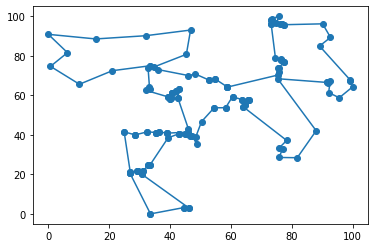

Route: [  0  76  56  92  72  83  63  95  75  98 114 106 112 108  97 109 107  99
 104 100 111 102 105  96 115 110 103 101  94  74  66  86  68  88  62  82
  85  65  89  69  73  93  91  71  17  26 146 126  16 135 155 121 141  35
 139 119  34 138 118 133 153 128 148 129 149 136 116 132 152 150 130 134
 154 124 144 145 125 123 143 120 140 147 127 137 117 142 122  28  24 151
 131  33  32  31  18  25  23  27  79  59  58  78  60  80  67  87  64  84
  70  90  61  81  57  77  22  29  30  20  19  21   6  10   3  14   2  12
   1   8   4   7  11  55  48  43  38  54  45  39  46  42  44  36  47  40
  52  37  49 113  41  53  51  13  50  15   9   5]

Distance_scaled: 611.7603724556814


In [42]:


import matplotlib.pyplot as plt
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([scaled[route[i]] for i in range(len(route))]),np.array([scaled[0]])))
# Plot the cities.
plt.scatter(scaled[:,0],scaled[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance_scaled: " + str(path_distance(route,scaled)))

In [36]:
Distance_km = path_distance(route, scaled) * 53.31
Distance_km

32612.945455612375

In [38]:
order = pd.DataFrame(route, columns=["index"])
Data["index"] = Data.index
Data
travel=order.merge(Data, on = "index")

In [39]:
start = travel[0:1]
loop = travel.append(start)
loop

,index,Geometri,Latitude,Longitude,City,Biaya,21-Dec-19,22-Dec-19,23-Dec-19,24-Dec-19,25-Dec-19,26-Dec-19,27-Dec-19,28-Dec-19,ID_City,lat_radians,lon_radians,x,y
0,0,northeast,0.048731,1.719746,Tao Silalahi hotel,IDR -,24,26,27,27,27,26,27,26,0,0.000851,0.030015,6368.128049,5.416220
1,76,northeast,0.047059,1.722485,Pasir putih Parbaba,"IDR 10,000.00",24,26,27,24,27,26,27,26,76,0.000821,0.030063,6368.119057,5.230391
2,56,northeast,0.047059,1.722485,Pasir putih Parbaba,"IDR 10,000.00",24,26,27,24,27,26,27,26,56,0.000821,0.030063,6368.119057,5.230391
3,92,northeast,0.047110,1.722490,Pantai Indah Situngkir (PIS),IDR -,21,22,23,23,23,23,23,23,92,0.000822,0.030063,6368.119036,5.236063
4,72,northeast,0.047110,1.722490,Pantai Indah Situngkir (PIS),IDR -,21,22,23,23,23,23,23,23,72,0.000822,0.030063,6368.119036,5.236063
5,83,northeast,0.048196,1.723098,Pantai Batu Hoda (Batu Hoda Beach),"IDR 140,000.00",24,26,27,27,27,26,27,26,83,0.000841,0.030074,6368.116905,5.356724
6,63,northeast,0.048196,1.723098,Pantai Batu Hoda (Batu Hoda Beach),"IDR 140,000.00",24,26,27,27,27,26,27,26,63,0.000841,0.030074,6368.116905,5.356724
7,95,northeast,0.048057,1.723438,Museum Huta Bolon Simanindo,IDR -,25,27,28,28,28,27,28,28,95,0.000839,0.030080,6368.115780,5.341239
8,75,northeast,0.048057,1.723438,Museum Huta Bolon Simanindo,IDR -,25,27,28,28,28,27,28,28,75,0.000839,0.030080,6368.115780,5.341239
9,98,northeast,0.048878,1.724125,Garoga Beach,IDR -,24,26,27,27,27,26,27,26,98,0.000853,0.030092,6368.113406,5.432537


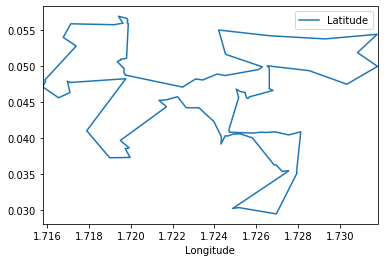

In [40]:
loop.plot(kind="line", x="Longitude", y="Latitude")